In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px #for creating visualizations like charts and graphs in Python.
import itertools #provides tools for working with iterables
import plotly.graph_objects as go #low-level drawing program where you build everything from scratch using individual lines, shapes, and colors.
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

In [113]:
data = pd.read_csv('C:/Users/user/OneDrive/Desktop/5th Project/powerconsumption.csv')

In [114]:
data.shape

(52416, 9)

In [115]:
data.head()

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [116]:
data.columns

Index(['Datetime', 'Temperature', 'Humidity', 'WindSpeed',
       'GeneralDiffuseFlows', 'DiffuseFlows', 'PowerConsumption_Zone1',
       'PowerConsumption_Zone2', 'PowerConsumption_Zone3'],
      dtype='object')

In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Datetime                52416 non-null  object 
 1   Temperature             52416 non-null  float64
 2   Humidity                52416 non-null  float64
 3   WindSpeed               52416 non-null  float64
 4   GeneralDiffuseFlows     52416 non-null  float64
 5   DiffuseFlows            52416 non-null  float64
 6   PowerConsumption_Zone1  52416 non-null  float64
 7   PowerConsumption_Zone2  52416 non-null  float64
 8   PowerConsumption_Zone3  52416 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.6+ MB


In [118]:
data.describe()

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
count,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000
mean,18.810024,68.259518,1.959489,182.696614,75.028022,32344.970564,21042.509082,17835.406218
std,5.815476,15.551177,2.348862,264.400960,124.210949,7130.562564,5201.465892,6622.165099
min,3.247000,11.340000,0.050000,0.004000,0.011000,13895.696200,8560.081466,5935.174070
25%,14.410000,58.310000,0.078000,0.062000,0.122000,26310.668692,16980.766032,13129.326630
50%,18.780000,69.860000,0.086000,5.035500,4.456000,32265.920340,20823.168405,16415.117470
75%,22.890000,81.400000,4.915000,319.600000,101.000000,37309.018185,24713.717520,21624.100420
max,40.010000,94.800000,6.483000,1163.000000,936.000000,52204.395120,37408.860760,47598.326360


In [119]:
duplicate_count = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


In [120]:
data = data.drop_duplicates()
duplicate_count = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


In [121]:
data.isnull().sum()

Datetime                  0
Temperature               0
Humidity                  0
WindSpeed                 0
GeneralDiffuseFlows       0
DiffuseFlows              0
PowerConsumption_Zone1    0
PowerConsumption_Zone2    0
PowerConsumption_Zone3    0
dtype: int64

In [122]:
import pandas as pd

# Assuming your DataFrame is named 'df'
for column in data.columns:
    unique_values = data[column].unique()
    num_unique = len(unique_values)
    print(f"{column} has {num_unique} unique values")

Datetime has 52416 unique values
Temperature has 3437 unique values
Humidity has 4443 unique values
WindSpeed has 548 unique values
GeneralDiffuseFlows has 10504 unique values
DiffuseFlows has 10449 unique values
PowerConsumption_Zone1 has 27709 unique values
PowerConsumption_Zone2 has 29621 unique values
PowerConsumption_Zone3 has 22838 unique values


In [123]:
# Convert the 'Datetime' column to datetime format
data['Datetime'] = pd.to_datetime(data['Datetime'])

# Create a new 'date' column by extracting only the date part
data['date'] = data['Datetime'].dt.date

# Display the result
print(data)

                 Datetime  Temperature  Humidity  WindSpeed  \
0     2017-01-01 00:00:00        6.559      73.8      0.083   
1     2017-01-01 00:10:00        6.414      74.5      0.083   
2     2017-01-01 00:20:00        6.313      74.5      0.080   
3     2017-01-01 00:30:00        6.121      75.0      0.083   
4     2017-01-01 00:40:00        5.921      75.7      0.081   
...                   ...          ...       ...        ...   
52411 2017-12-30 23:10:00        7.010      72.4      0.080   
52412 2017-12-30 23:20:00        6.947      72.6      0.082   
52413 2017-12-30 23:30:00        6.900      72.8      0.086   
52414 2017-12-30 23:40:00        6.758      73.0      0.080   
52415 2017-12-30 23:50:00        6.580      74.1      0.081   

       GeneralDiffuseFlows  DiffuseFlows  PowerConsumption_Zone1  \
0                    0.051         0.119             34055.69620   
1                    0.070         0.085             29814.68354   
2                    0.062         0.10

In [124]:
# Assuming you have already read your dataframe 'data'

# Convert the Datetime column to datetime format
data['Datetime'] = pd.to_datetime(data['Datetime'])

# Create new columns
data['Year'] = data['Datetime'].dt.year
data['Month'] = data['Datetime'].dt.month
data['Day'] = data['Datetime'].dt.day
data['Hour'] = data['Datetime'].dt.hour

# Define time of day categories
def categorize_time_of_day(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 24:
        return 'Evening'
    else:
        return 'Night'

data['TimeOfDay'] = data['Hour'].apply(categorize_time_of_day)

# Add day of the week (0 = Monday, 6 = Sunday)
data['Weekday'] = data['Datetime'].dt.weekday

# Add a column to indicate if it's a weekend
data['IsWeekend'] = data['Weekday'].apply(lambda x: 1 if x >= 5 else 0)

# Define the seasons
def categorize_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

data['Season'] = data['Month'].apply(categorize_season)

# Let's set the data types to numeric
data['Year'] = data['Year'].astype(int)
data['Weekday'] = data['Weekday'].astype(int)
data['IsWeekend'] = data['IsWeekend'].astype(int)

data.tail()

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,date,Year,Month,Day,Hour,TimeOfDay,Weekday,IsWeekend,Season
52411,2017-12-30 23:10:00,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212,2017-12-30,2017,12,30,23,Evening,5,1,Winter
52412,2017-12-30 23:20:00,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152,2017-12-30,2017,12,30,23,Evening,5,1,Winter
52413,2017-12-30 23:30:00,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259,2017-12-30,2017,12,30,23,Evening,5,1,Winter
52414,2017-12-30 23:40:00,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504,2017-12-30,2017,12,30,23,Evening,5,1,Winter
52415,2017-12-30 23:50:00,6.580,74.1,0.081,0.062,0.111,28349.80989,24055.23167,13345.49820,2017-12-30,2017,12,30,23,Evening,5,1,Winter


In [125]:
data.isnull().sum()

Datetime                  0
Temperature               0
Humidity                  0
WindSpeed                 0
GeneralDiffuseFlows       0
DiffuseFlows              0
PowerConsumption_Zone1    0
PowerConsumption_Zone2    0
PowerConsumption_Zone3    0
date                      0
Year                      0
Month                     0
Day                       0
Hour                      0
TimeOfDay                 0
Weekday                   0
IsWeekend                 0
Season                    0
dtype: int64

In [126]:
data.drop(columns=['Datetime'], inplace=True)
data.drop(columns=['date'], inplace=True)

In [127]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    # Categorical columns
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtype == "O"]
    
    # Numeric columns:
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    
    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    
    return cat_cols, num_cols

cat_cols, num_cols = grab_col_names(data)

Observations: 52416
Variables: 16
cat_cols: 2
num_cols: 14


In [128]:
cat_cols

['TimeOfDay', 'Season']

In [129]:
data[cat_cols]

,TimeOfDay,Season
0,Night,Winter
1,Night,Winter
2,Night,Winter
3,Night,Winter
4,Night,Winter
...,...,...
52411,Evening,Winter
52412,Evening,Winter
52413,Evening,Winter
52414,Evening,Winter


In [130]:
# Convert categorical variables to numerical values using One-Hot Encoding
data_encoded = pd.get_dummies(data, columns=['TimeOfDay', 'Season'])

# Convert the columns resulting from One-Hot Encoding to integer values
data_encoded = data_encoded.astype(int)

# Display the results
data_encoded.head(6)

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,Year,Month,...,Weekday,IsWeekend,TimeOfDay_Afternoon,TimeOfDay_Evening,TimeOfDay_Morning,TimeOfDay_Night,Season_Autumn,Season_Spring,Season_Summer,Season_Winter
0,6,73,0,0,0,34055,16128,20240,2017,1,...,6,1,0,0,0,1,0,0,0,1
1,6,74,0,0,0,29814,19375,20131,2017,1,...,6,1,0,0,0,1,0,0,0,1
2,6,74,0,0,0,29128,19006,19668,2017,1,...,6,1,0,0,0,1,0,0,0,1
3,6,75,0,0,0,28228,18361,18899,2017,1,...,6,1,0,0,0,1,0,0,0,1
4,5,75,0,0,0,27335,17872,18442,2017,1,...,6,1,0,0,0,1,0,0,0,1
5,5,76,0,0,0,26624,17416,18130,2017,1,...,6,1,0,0,0,1,0,0,0,1


In [131]:
data_encoded.isnull().sum()

Temperature               0
Humidity                  0
WindSpeed                 0
GeneralDiffuseFlows       0
DiffuseFlows              0
PowerConsumption_Zone1    0
PowerConsumption_Zone2    0
PowerConsumption_Zone3    0
Year                      0
Month                     0
Day                       0
Hour                      0
Weekday                   0
IsWeekend                 0
TimeOfDay_Afternoon       0
TimeOfDay_Evening         0
TimeOfDay_Morning         0
TimeOfDay_Night           0
Season_Autumn             0
Season_Spring             0
Season_Summer             0
Season_Winter             0
dtype: int64

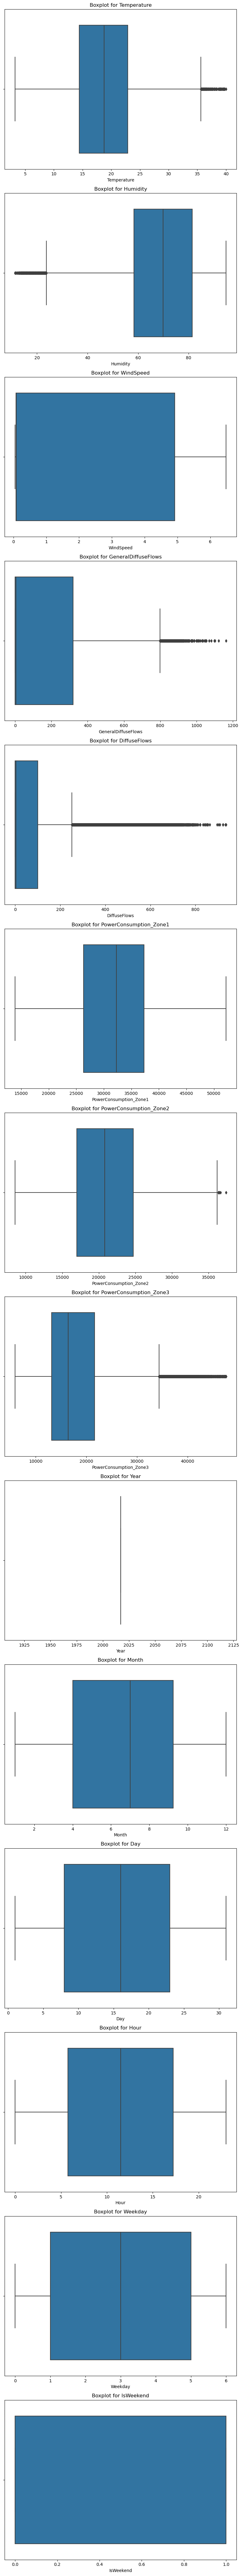

In [132]:
# Step 1: Identify and visualize outliers for each numerical column
num_columns = data.select_dtypes(include=['number']).columns
num_plots = len(num_columns)

fig, axes = plt.subplots(nrows=num_plots, ncols=1, figsize=(8, 6 * num_plots))

for i, column in enumerate(num_columns):
    # Visualize distribution and identify outliers using boxplot
    sns.boxplot(x=data[column], ax=axes[i])
    axes[i].set_title(f'Boxplot for {column}')

plt.tight_layout()
plt.show()

In [133]:
data.isnull().sum()

Temperature               0
Humidity                  0
WindSpeed                 0
GeneralDiffuseFlows       0
DiffuseFlows              0
PowerConsumption_Zone1    0
PowerConsumption_Zone2    0
PowerConsumption_Zone3    0
Year                      0
Month                     0
Day                       0
Hour                      0
TimeOfDay                 0
Weekday                   0
IsWeekend                 0
Season                    0
dtype: int64

In [134]:
import pandas as pd

# Assuming data is your DataFrame
def apply_iqr(data):
    # Iterate through each column
    for col in data.columns:
        if pd.api.types.is_numeric_dtype(data[col]):
            Q1 = data[col].quantile(0.25)  # First quartile (25%)
            Q3 = data[col].quantile(0.75)  # Third quartile (75%)
            IQR = Q3 - Q1  # Interquartile range
            
            # Define the outlier boundaries
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            # Replace outliers with NaN or you can choose to cap them
            data[col] = data[col].apply(lambda x: x if lower_bound <= x <= upper_bound else None)
    
    return data

# Apply IQR on your DataFrame
data_cleaned = apply_iqr(data)

In [135]:
data

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,Year,Month,Day,Hour,TimeOfDay,Weekday,IsWeekend,Season
0,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,2017,1,1,0,Night,6,1,Winter
1,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,2017,1,1,0,Night,6,1,Winter
2,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,2017,1,1,0,Night,6,1,Winter
3,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,2017,1,1,0,Night,6,1,Winter
4,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,2017,1,1,0,Night,6,1,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52411,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212,2017,12,30,23,Evening,5,1,Winter
52412,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152,2017,12,30,23,Evening,5,1,Winter
52413,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259,2017,12,30,23,Evening,5,1,Winter
52414,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504,2017,12,30,23,Evening,5,1,Winter


In [136]:
data_cleaned

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,Year,Month,Day,Hour,TimeOfDay,Weekday,IsWeekend,Season
0,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,2017,1,1,0,Night,6,1,Winter
1,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,2017,1,1,0,Night,6,1,Winter
2,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,2017,1,1,0,Night,6,1,Winter
3,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,2017,1,1,0,Night,6,1,Winter
4,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,2017,1,1,0,Night,6,1,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52411,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212,2017,12,30,23,Evening,5,1,Winter
52412,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152,2017,12,30,23,Evening,5,1,Winter
52413,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259,2017,12,30,23,Evening,5,1,Winter
52414,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504,2017,12,30,23,Evening,5,1,Winter


In [137]:
data.isnull().sum()

Temperature                142
Humidity                   291
WindSpeed                    0
GeneralDiffuseFlows       2315
DiffuseFlows              4571
PowerConsumption_Zone1       0
PowerConsumption_Zone2       7
PowerConsumption_Zone3    1191
Year                         0
Month                        0
Day                          0
Hour                         0
TimeOfDay                    0
Weekday                      0
IsWeekend                    0
Season                       0
dtype: int64

In [138]:
data_cleaned.isnull().sum()

Temperature                142
Humidity                   291
WindSpeed                    0
GeneralDiffuseFlows       2315
DiffuseFlows              4571
PowerConsumption_Zone1       0
PowerConsumption_Zone2       7
PowerConsumption_Zone3    1191
Year                         0
Month                        0
Day                          0
Hour                         0
TimeOfDay                    0
Weekday                      0
IsWeekend                    0
Season                       0
dtype: int64

In [139]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Mean/Median Imputation
imputer = SimpleImputer(strategy='mean')  # Or 'median'
data['GeneralDiffuseFlows'] = imputer.fit_transform(data[['GeneralDiffuseFlows']])
data['DiffuseFlows'] = imputer.fit_transform(data[['DiffuseFlows']])
data['PowerConsumption_Zone3'] = imputer.fit_transform(data[['PowerConsumption_Zone3']])
data['Temperature'] = imputer.fit_transform(data[['Temperature']])
data['Humidity'] = imputer.fit_transform(data[['Humidity']])
data['PowerConsumption_Zone2'] = imputer.fit_transform(data[['PowerConsumption_Zone2']])


In [140]:
data.isnull().sum()

Temperature               0
Humidity                  0
WindSpeed                 0
GeneralDiffuseFlows       0
DiffuseFlows              0
PowerConsumption_Zone1    0
PowerConsumption_Zone2    0
PowerConsumption_Zone3    0
Year                      0
Month                     0
Day                       0
Hour                      0
TimeOfDay                 0
Weekday                   0
IsWeekend                 0
Season                    0
dtype: int64

In [141]:
data_cleaned.isnull().sum()

Temperature               0
Humidity                  0
WindSpeed                 0
GeneralDiffuseFlows       0
DiffuseFlows              0
PowerConsumption_Zone1    0
PowerConsumption_Zone2    0
PowerConsumption_Zone3    0
Year                      0
Month                     0
Day                       0
Hour                      0
TimeOfDay                 0
Weekday                   0
IsWeekend                 0
Season                    0
dtype: int64

In [142]:
def detect_outliers_zscore(data_cleaned, column):
    z_scores = (data_cleaned[column] - data_cleaned[column].mean()) / data_cleaned[column].std()
    threshold = 3
    outliers = data_cleaned[abs(z_scores) > threshold]
    return outliers

outliers = detect_outliers_zscore(data_cleaned, 'GeneralDiffuseFlows')


def cap_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df[column] = np.clip(df[column],
 lower_bound, upper_bound)

df = cap_outliers(data_cleaned, 'GeneralDiffuseFlows')

outliers_after_capping = detect_outliers_zscore(data_cleaned, 'GeneralDiffuseFlows')
print("Outliers after capping:", outliers_after_capping)

Outliers after capping: Empty DataFrame
Columns: [Temperature, Humidity, WindSpeed, GeneralDiffuseFlows, DiffuseFlows, PowerConsumption_Zone1, PowerConsumption_Zone2, PowerConsumption_Zone3, Year, Month, Day, Hour, TimeOfDay, Weekday, IsWeekend, Season]
Index: []


In [143]:
def detect_outliers_zscore(data, column):
    z_scores = (data[column] - data[column].mean()) / data[column].std()
    threshold = 3
    outliers = data[abs(z_scores) > threshold]
    return outliers

outliers = detect_outliers_zscore(data, 'DiffuseFlows')


def cap_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df[column] = np.clip(df[column],
 lower_bound, upper_bound)

df = cap_outliers(data, 'DiffuseFlows')

outliers_after_capping = detect_outliers_zscore(data, 'DiffuseFlows')
print("Outliers after capping:", outliers_after_capping)

Outliers after capping: Empty DataFrame
Columns: [Temperature, Humidity, WindSpeed, GeneralDiffuseFlows, DiffuseFlows, PowerConsumption_Zone1, PowerConsumption_Zone2, PowerConsumption_Zone3, Year, Month, Day, Hour, TimeOfDay, Weekday, IsWeekend, Season]
Index: []


In [144]:
def detect_outliers_zscore(data, column):
    z_scores = (data[column] - data[column].mean()) / data[column].std()
    threshold = 3
    outliers = data[abs(z_scores) > threshold]
    return outliers

outliers = detect_outliers_zscore(data, 'PowerConsumption_Zone3')


def cap_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df[column] = np.clip(df[column],
 lower_bound, upper_bound)

df = cap_outliers(data, 'PowerConsumption_Zone3')

outliers_after_capping = detect_outliers_zscore(data, 'PowerConsumption_Zone3')
print("Outliers after capping:", outliers_after_capping)

Outliers after capping: Empty DataFrame
Columns: [Temperature, Humidity, WindSpeed, GeneralDiffuseFlows, DiffuseFlows, PowerConsumption_Zone1, PowerConsumption_Zone2, PowerConsumption_Zone3, Year, Month, Day, Hour, TimeOfDay, Weekday, IsWeekend, Season]
Index: []


In [145]:
def detect_outliers_zscore(data, column):
    z_scores = (data[column] - data[column].mean()) / data[column].std()
    threshold = 3
    outliers = data[abs(z_scores) > threshold]
    return outliers

outliers = detect_outliers_zscore(data, 'Temperature')


def cap_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df[column] = np.clip(df[column],
 lower_bound, upper_bound)

df = cap_outliers(data, 'Temperature')

outliers_after_capping = detect_outliers_zscore(data, 'Temperature')
print("Outliers after capping:", outliers_after_capping)

Outliers after capping: Empty DataFrame
Columns: [Temperature, Humidity, WindSpeed, GeneralDiffuseFlows, DiffuseFlows, PowerConsumption_Zone1, PowerConsumption_Zone2, PowerConsumption_Zone3, Year, Month, Day, Hour, TimeOfDay, Weekday, IsWeekend, Season]
Index: []


In [146]:
def detect_outliers_zscore(data, column):
    z_scores = (data[column] - data[column].mean()) / data[column].std()
    threshold = 3
    outliers = data[abs(z_scores) > threshold]
    return outliers

outliers = detect_outliers_zscore(data, 'Humidity')


def cap_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df[column] = np.clip(df[column],
 lower_bound, upper_bound)

df = cap_outliers(data, 'Humidity')

outliers_after_capping = detect_outliers_zscore(data, 'Humidity')
print("Outliers after capping:", outliers_after_capping)

Outliers after capping: Empty DataFrame
Columns: [Temperature, Humidity, WindSpeed, GeneralDiffuseFlows, DiffuseFlows, PowerConsumption_Zone1, PowerConsumption_Zone2, PowerConsumption_Zone3, Year, Month, Day, Hour, TimeOfDay, Weekday, IsWeekend, Season]
Index: []


In [147]:
def detect_outliers_zscore(data, column):
    z_scores = (data[column] - data[column].mean()) / data[column].std()
    threshold = 3
    outliers = data[abs(z_scores) > threshold]
    return outliers

outliers = detect_outliers_zscore(data, 'PowerConsumption_Zone2')


def cap_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df[column] = np.clip(df[column],
 lower_bound, upper_bound)

df = cap_outliers(data, 'PowerConsumption_Zone2')

outliers_after_capping = detect_outliers_zscore(data, 'PowerConsumption_Zone2')
print("Outliers after capping:", outliers_after_capping)

Outliers after capping: Empty DataFrame
Columns: [Temperature, Humidity, WindSpeed, GeneralDiffuseFlows, DiffuseFlows, PowerConsumption_Zone1, PowerConsumption_Zone2, PowerConsumption_Zone3, Year, Month, Day, Hour, TimeOfDay, Weekday, IsWeekend, Season]
Index: []


In [45]:
# import numpy as np
# import pandas as pd

# # Assuming your dataset is in a DataFrame named 'df'
# q1 = np.quantile(data['Temperature'], 0.25)
# q3 = np.quantile(data['Temperature'], 0.75)
# iqr = q3 - q1

# # Calculate lower and upper bounds
# lower_bound = q1 - 1.5 * iqr
# upper_bound = q3 + 1.5 * iqr

# # Identify outliers
# outliers = data[(data['Temperature'] < lower_bound) | (data['Temperature'] > upper_bound)]

# print("Outlier(s) in the 'Temperature' column:")
# print(outliers)

In [46]:
# # Step 1: Identify and visualize outliers for each numerical column
# num_columns = data.select_dtypes(include=['number']).columns
# num_plots = len(num_columns)

# fig, axes = plt.subplots(nrows=num_plots, ncols=1, figsize=(8, 6 * num_plots))

# for i, column in enumerate(num_columns):
#     # Visualize distribution and identify outliers using boxplot
#     sns.boxplot(x=data[column], ax=axes[i])
#     axes[i].set_title(f'Boxplot for {column}')

# plt.tight_layout()
# plt.show()

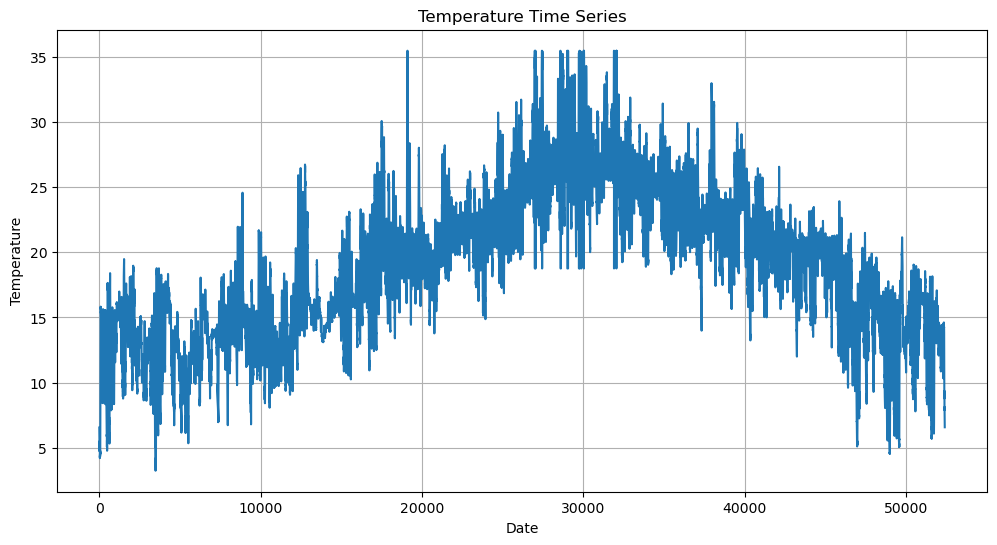

In [148]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Temperature'])
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Temperature Time Series')
plt.grid(True)
plt.show()

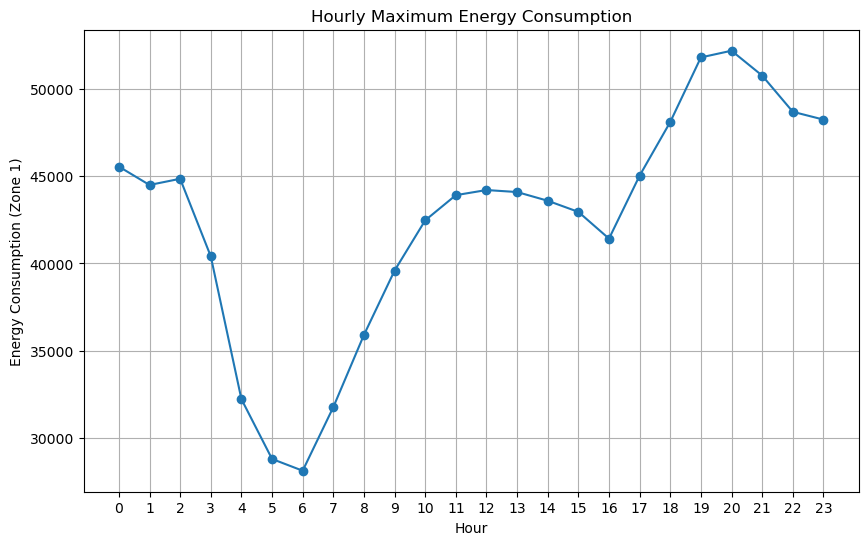

In [149]:
# Calculate the hourly maximum energy consumption
hourly_max = data.groupby('Hour')['PowerConsumption_Zone1'].max().reset_index()

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(hourly_max['Hour'], hourly_max['PowerConsumption_Zone1'], marker='o')
plt.title('Hourly Maximum Energy Consumption')
plt.xlabel('Hour')
plt.ylabel('Energy Consumption (Zone 1)')
plt.grid(True)
plt.xticks(range(0, 24))
plt.show()

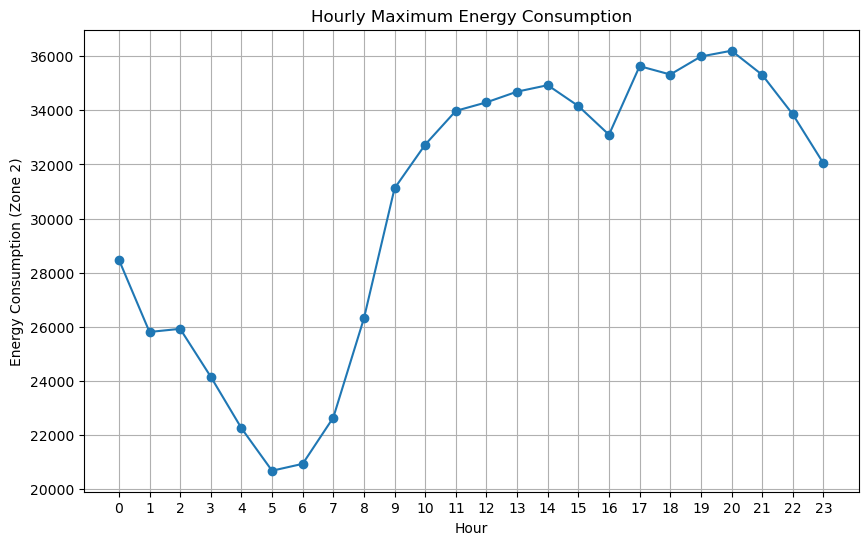

In [150]:
# Calculate the hourly maximum energy consumption
hourly_max = data.groupby('Hour')['PowerConsumption_Zone2'].max().reset_index()

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(hourly_max['Hour'], hourly_max['PowerConsumption_Zone2'], marker='o')
plt.title('Hourly Maximum Energy Consumption')
plt.xlabel('Hour')
plt.ylabel('Energy Consumption (Zone 2)')
plt.grid(True)
plt.xticks(range(0, 24))
plt.show()

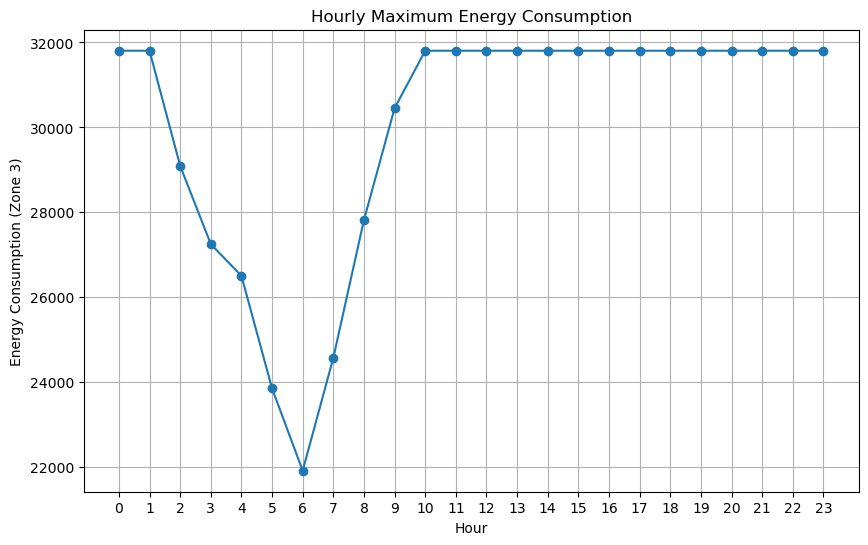

In [151]:
# Calculate the hourly maximum energy consumption
hourly_max = data.groupby('Hour')['PowerConsumption_Zone3'].max().reset_index()

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(hourly_max['Hour'], hourly_max['PowerConsumption_Zone3'], marker='o')
plt.title('Hourly Maximum Energy Consumption')
plt.xlabel('Hour')
plt.ylabel('Energy Consumption (Zone 3)')
plt.grid(True)
plt.xticks(range(0, 24))
plt.show()

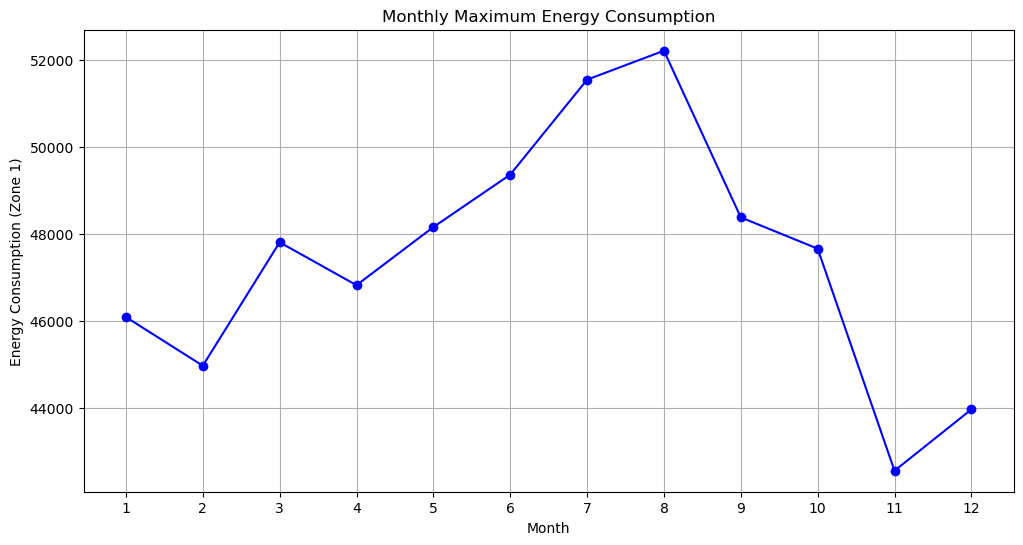

In [152]:
# Monthly maximum energy consumption
monthly_max = data.groupby('Month')['PowerConsumption_Zone1'].max().reset_index()

# Plot for monthly maximum energy consumption
plt.figure(figsize=(12, 6))
plt.plot(monthly_max['Month'], monthly_max['PowerConsumption_Zone1'], marker='o', linestyle='-', color='b')
plt.title('Monthly Maximum Energy Consumption')
plt.xlabel('Month')
plt.ylabel('Energy Consumption (Zone 1)')
plt.grid(True)
plt.xticks(range(1, 13))
plt.show()

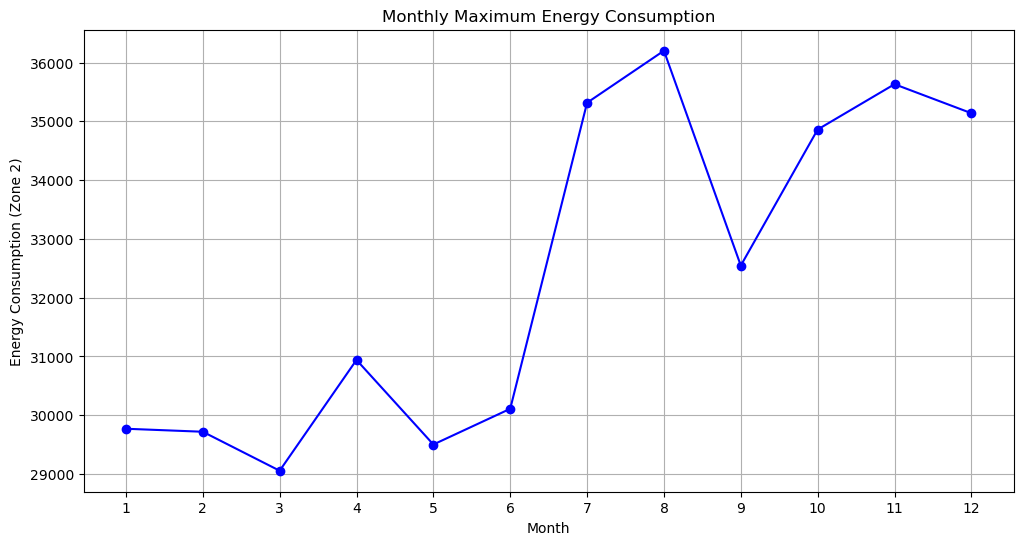

In [153]:
# Monthly maximum energy consumption
monthly_max = data.groupby('Month')['PowerConsumption_Zone2'].max().reset_index()

# Plot for monthly maximum energy consumption
plt.figure(figsize=(12, 6))
plt.plot(monthly_max['Month'], monthly_max['PowerConsumption_Zone2'], marker='o', linestyle='-', color='b')
plt.title('Monthly Maximum Energy Consumption')
plt.xlabel('Month')
plt.ylabel('Energy Consumption (Zone 2)')
plt.grid(True)
plt.xticks(range(1, 13))
plt.show()

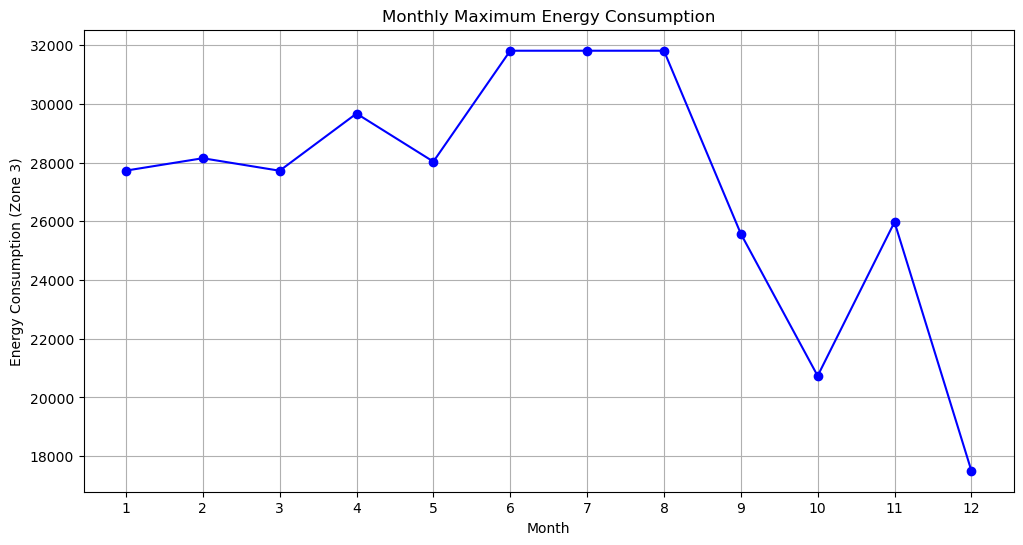

In [154]:
# Monthly maximum energy consumption
monthly_max = data.groupby('Month')['PowerConsumption_Zone3'].max().reset_index()

# Plot for monthly maximum energy consumption
plt.figure(figsize=(12, 6))
plt.plot(monthly_max['Month'], monthly_max['PowerConsumption_Zone3'], marker='o', linestyle='-', color='b')
plt.title('Monthly Maximum Energy Consumption')
plt.xlabel('Month')
plt.ylabel('Energy Consumption (Zone 3)')
plt.grid(True)
plt.xticks(range(1, 13))
plt.show()

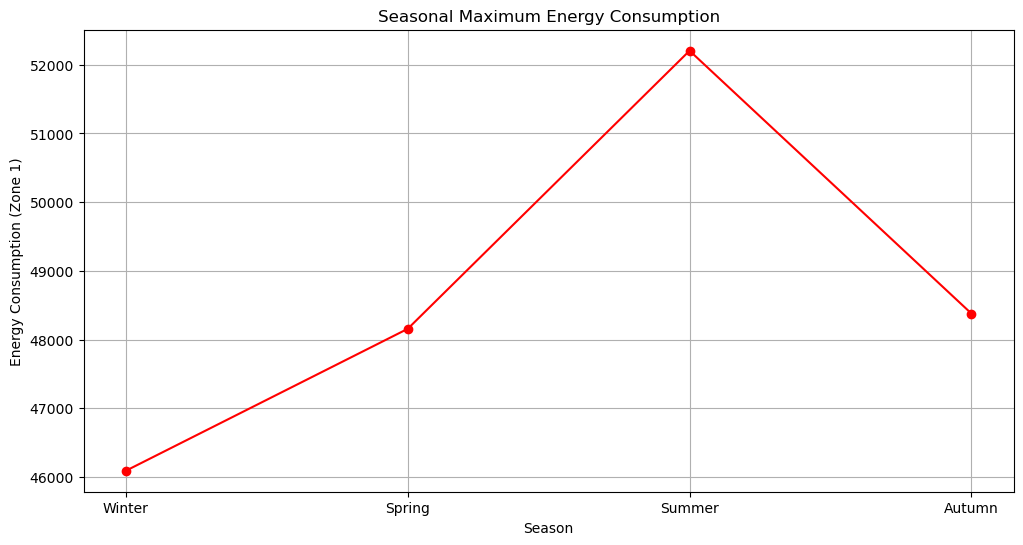

In [155]:
# Seasonal maximum energy consumption
seasonal_max = data.groupby('Season')['PowerConsumption_Zone1'].max().reset_index()

# To display seasons in order
seasonal_max['Season'] = pd.Categorical(seasonal_max['Season'], categories=['Winter', 'Spring', 'Summer', 'Autumn'], ordered=True)
seasonal_max = seasonal_max.sort_values('Season')

# Plot for seasonal maximum energy consumption
plt.figure(figsize=(12, 6))
plt.plot(seasonal_max['Season'], seasonal_max['PowerConsumption_Zone1'], marker='o', linestyle='-', color='r')
plt.title('Seasonal Maximum Energy Consumption')
plt.xlabel('Season')
plt.ylabel('Energy Consumption (Zone 1)')
plt.grid(True)
plt.show()

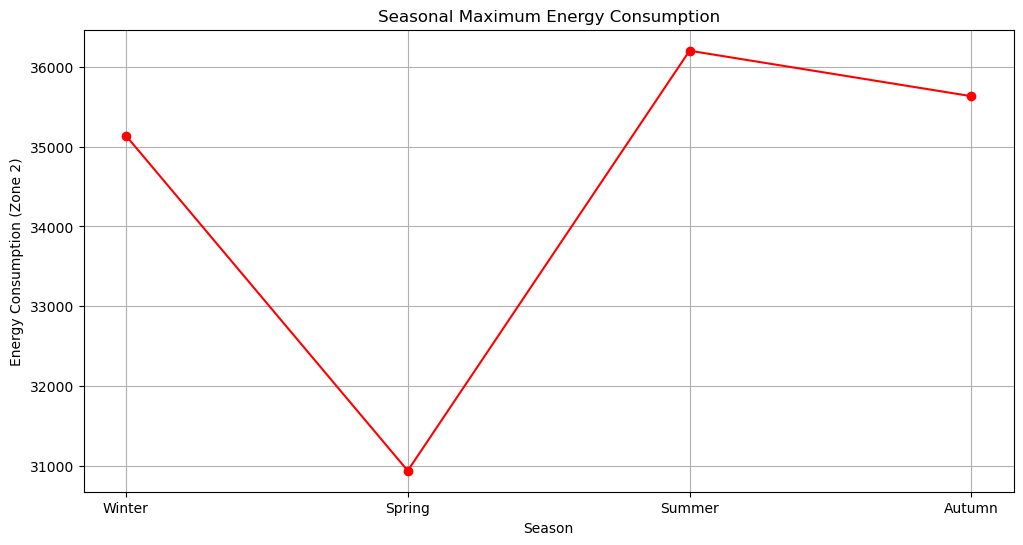

In [156]:
# Seasonal maximum energy consumption
seasonal_max = data.groupby('Season')['PowerConsumption_Zone2'].max().reset_index()

# To display seasons in order
seasonal_max['Season'] = pd.Categorical(seasonal_max['Season'], categories=['Winter', 'Spring', 'Summer', 'Autumn'], ordered=True)
seasonal_max = seasonal_max.sort_values('Season')

# Plot for seasonal maximum energy consumption
plt.figure(figsize=(12, 6))
plt.plot(seasonal_max['Season'], seasonal_max['PowerConsumption_Zone2'], marker='o', linestyle='-', color='r')
plt.title('Seasonal Maximum Energy Consumption')
plt.xlabel('Season')
plt.ylabel('Energy Consumption (Zone 2)')
plt.grid(True)
plt.show()

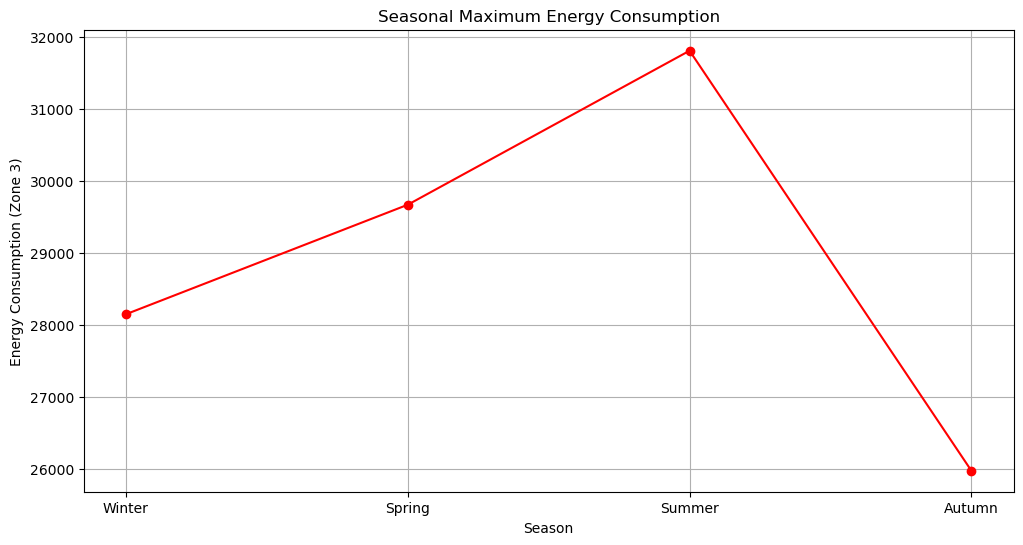

In [157]:
# Seasonal maximum energy consumption
seasonal_max = data.groupby('Season')['PowerConsumption_Zone3'].max().reset_index()

# To display seasons in order
seasonal_max['Season'] = pd.Categorical(seasonal_max['Season'], categories=['Winter', 'Spring', 'Summer', 'Autumn'], ordered=True)
seasonal_max = seasonal_max.sort_values('Season')

# Plot for seasonal maximum energy consumption
plt.figure(figsize=(12, 6))
plt.plot(seasonal_max['Season'], seasonal_max['PowerConsumption_Zone3'], marker='o', linestyle='-', color='r')
plt.title('Seasonal Maximum Energy Consumption')
plt.xlabel('Season')
plt.ylabel('Energy Consumption (Zone 3)')
plt.grid(True)
plt.show()

In [158]:
data

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,Year,Month,Day,Hour,TimeOfDay,Weekday,IsWeekend,Season
0,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,2017,1,1,0,Night,6,1,Winter
1,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,2017,1,1,0,Night,6,1,Winter
2,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,2017,1,1,0,Night,6,1,Winter
3,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,2017,1,1,0,Night,6,1,Winter
4,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,2017,1,1,0,Night,6,1,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52411,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212,2017,12,30,23,Evening,5,1,Winter
52412,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152,2017,12,30,23,Evening,5,1,Winter
52413,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259,2017,12,30,23,Evening,5,1,Winter
52414,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504,2017,12,30,23,Evening,5,1,Winter


In [159]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Encode the 'TimeOfDay' column
data['TimeOfDay_encoded'] = le.fit_transform(data['TimeOfDay'])

# Encode the 'Season' column
data['Season_encoded'] = le.fit_transform(data['Season'])


data.drop(['TimeOfDay'],axis=1,inplace=True)

data.drop(['Season'],axis=1,inplace=True)

In [160]:
data.drop(['Year'],axis=1,inplace=True)

In [161]:
data

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,Month,Day,Hour,Weekday,IsWeekend,TimeOfDay_encoded,Season_encoded
0,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,1,1,0,6,1,3,3
1,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,1,1,0,6,1,3,3
2,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,1,1,0,6,1,3,3
3,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,1,1,0,6,1,3,3
4,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,1,1,0,6,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52411,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212,12,30,23,5,1,1,3
52412,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152,12,30,23,5,1,1,3
52413,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259,12,30,23,5,1,1,3
52414,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504,12,30,23,5,1,1,3


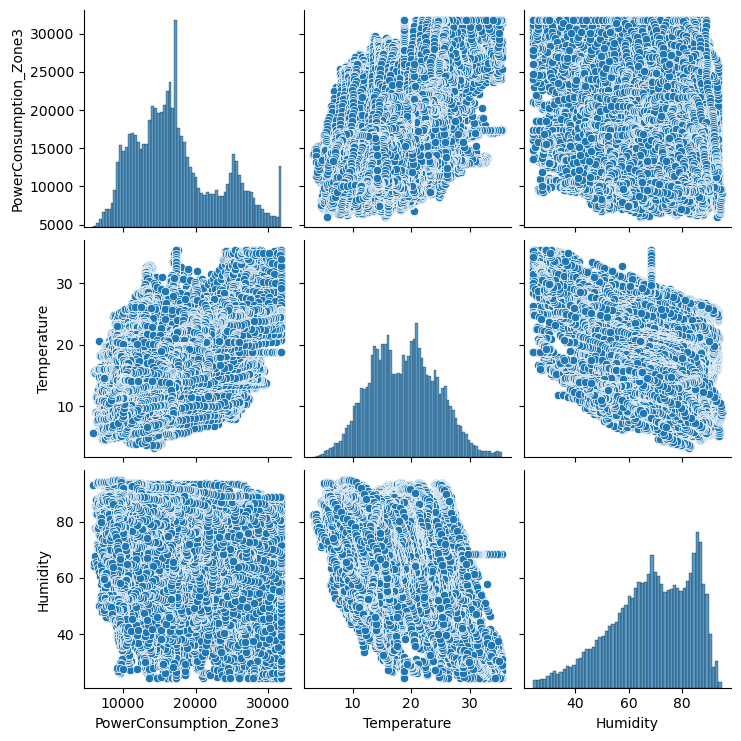

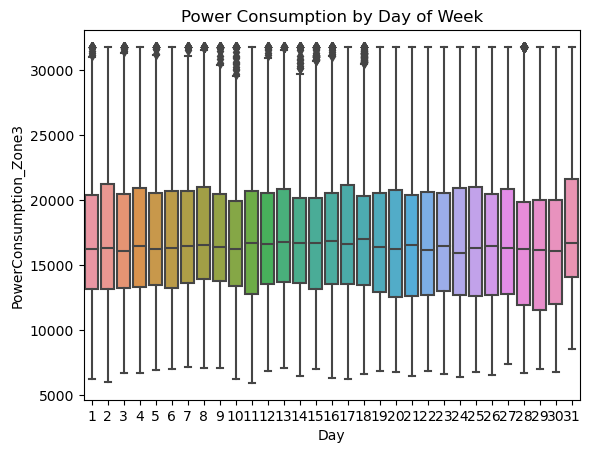

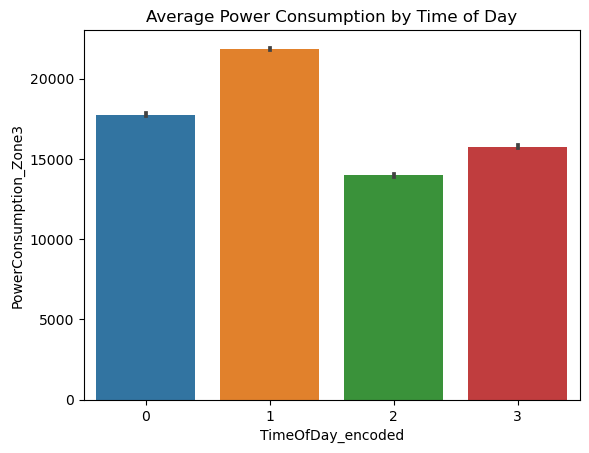

In [162]:


# Scatter Plot Matrix
sns.pairplot(data[['PowerConsumption_Zone3', 'Temperature', 'Humidity']])
plt.show()

# Box Plot for Categorical Variable (e.g., day_of_week)
sns.boxplot(x='Day', y='PowerConsumption_Zone3', data=data)
plt.title('Power Consumption by Day of Week')
plt.show()

# Bar Plot for Categorical Variable (e.g., time_of_day)
sns.barplot(x='TimeOfDay_encoded', y='PowerConsumption_Zone3', data=data)
plt.title('Average Power Consumption by Time of Day')
plt.show()

In [163]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaled_data = scaler.fit_transform(data)

scaled_df = pd.DataFrame(scaled_data, columns=data.columns)
scaled_df

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,Month,Day,Hour,Weekday,IsWeekend,TimeOfDay_encoded,Season_encoded
0,0.102816,0.701705,0.005130,0.000079,0.000666,0.526251,0.273821,0.552963,0.0,0.000000,0.0,1.000000,1.0,1.000000,1.0
1,0.098314,0.711648,0.005130,0.000111,0.000456,0.415545,0.391261,0.548716,0.0,0.000000,0.0,1.000000,1.0,1.000000,1.0
2,0.095179,0.711648,0.004663,0.000098,0.000549,0.397623,0.377933,0.530833,0.0,0.000000,0.0,1.000000,1.0,1.000000,1.0
3,0.089219,0.718750,0.005130,0.000147,0.000524,0.374149,0.354577,0.501103,0.0,0.000000,0.0,1.000000,1.0,1.000000,1.0
4,0.083010,0.728693,0.004819,0.000074,0.000456,0.350834,0.336895,0.483443,0.0,0.000000,0.0,1.000000,1.0,1.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52411,0.116816,0.681818,0.004663,0.000061,0.000524,0.450675,0.661951,0.341892,1.0,0.966667,1.0,0.833333,1.0,0.333333,1.0
52412,0.114860,0.684659,0.004974,0.000079,0.000505,0.431618,0.635442,0.328305,1.0,0.966667,1.0,0.833333,1.0,0.333333,1.0
52413,0.113401,0.687500,0.005596,0.000135,0.000388,0.409703,0.604803,0.304251,1.0,0.966667,1.0,0.833333,1.0,0.333333,1.0
52414,0.108993,0.690341,0.004663,0.000104,0.000481,0.393187,0.583623,0.292891,1.0,0.966667,1.0,0.833333,1.0,0.333333,1.0


In [164]:
data

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,Month,Day,Hour,Weekday,IsWeekend,TimeOfDay_encoded,Season_encoded
0,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,1,1,0,6,1,3,3
1,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,1,1,0,6,1,3,3
2,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,1,1,0,6,1,3,3
3,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,1,1,0,6,1,3,3
4,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,1,1,0,6,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52411,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212,12,30,23,5,1,1,3
52412,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152,12,30,23,5,1,1,3
52413,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259,12,30,23,5,1,1,3
52414,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504,12,30,23,5,1,1,3


In [165]:
scaled_data

array([[0.10281563, 0.70170455, 0.0051298 , ..., 1.        , 1.        ,
        1.        ],
       [0.09831435, 0.71164773, 0.0051298 , ..., 1.        , 1.        ,
        1.        ],
       [0.09517897, 0.71164773, 0.00466345, ..., 1.        , 1.        ,
        1.        ],
       ...,
       [0.11340142, 0.6875    , 0.00559614, ..., 1.        , 0.33333333,
        1.        ],
       [0.10899326, 0.69034091, 0.00466345, ..., 1.        , 0.33333333,
        1.        ],
       [0.10346754, 0.70596591, 0.0048189 , ..., 1.        , 0.33333333,
        1.        ]])

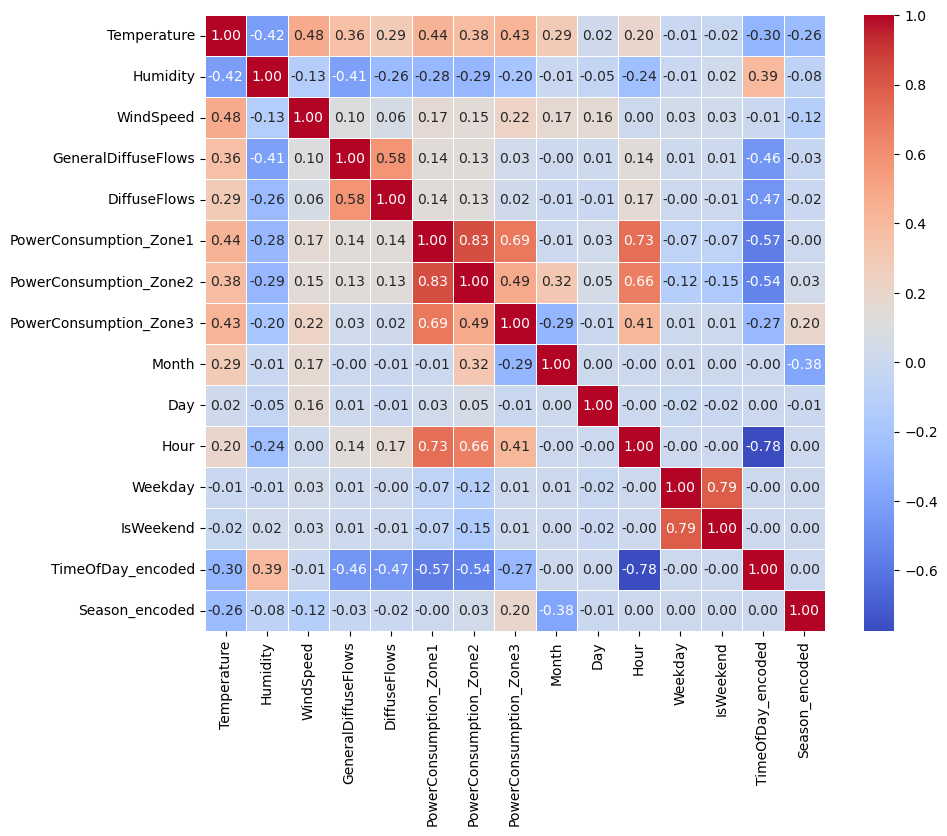

In [166]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.heatmap(scaled_df.corr(), annot=True, cmap='coolwarm', linewidths= 0.5 ,fmt=".2f")
plt.show()

In [167]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

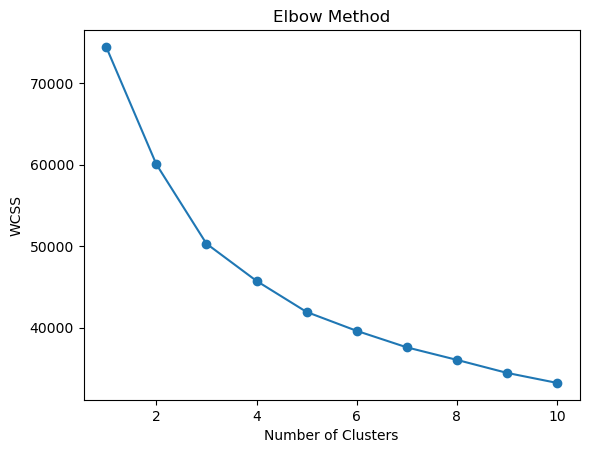

In [168]:
# Determine the optimal number of clusters using the Elbow Method
wcss = []
for K in range(1, 11):
    kmeans = KMeans(n_clusters=K, init='k-means++', max_iter=300, n_init=20, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plot the results of the Elbow Method
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


# plt.figure(figsize=(12, 6))
# plt.subplot(1, 2, 1)
# plt.plot(K_range, inertia_values, marker='o', linestyle='-')
# plt.xlabel('Number of Clusters (K)')
# plt.ylabel('Inertia (Within-cluster Sum of Squares)')
# plt.title('Elbow Method')
# plt.show()

In [169]:
# Apply the K-means algorithm
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
scaled_df['Cluster'] = kmeans.fit_predict(scaled_data)

# Add the clusters to the original DataFrame
scaled_df['Cluster'] = kmeans.labels_


# # Perform K-means clustering
# kmeans = KMeans(n_clusters=4, random_state=42)
# data['Cluster'] = kmeans.fit_predict(scaled_data)

In [170]:
scaled_data

array([[0.10281563, 0.70170455, 0.0051298 , ..., 1.        , 1.        ,
        1.        ],
       [0.09831435, 0.71164773, 0.0051298 , ..., 1.        , 1.        ,
        1.        ],
       [0.09517897, 0.71164773, 0.00466345, ..., 1.        , 1.        ,
        1.        ],
       ...,
       [0.11340142, 0.6875    , 0.00559614, ..., 1.        , 0.33333333,
        1.        ],
       [0.10899326, 0.69034091, 0.00466345, ..., 1.        , 0.33333333,
        1.        ],
       [0.10346754, 0.70596591, 0.0048189 , ..., 1.        , 0.33333333,
        1.        ]])

In [171]:
data

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,Month,Day,Hour,Weekday,IsWeekend,TimeOfDay_encoded,Season_encoded
0,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,1,1,0,6,1,3,3
1,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,1,1,0,6,1,3,3
2,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,1,1,0,6,1,3,3
3,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,1,1,0,6,1,3,3
4,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,1,1,0,6,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52411,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212,12,30,23,5,1,1,3
52412,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152,12,30,23,5,1,1,3
52413,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259,12,30,23,5,1,1,3
52414,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504,12,30,23,5,1,1,3


In [172]:
scaled_df['Cluster'].nunique()

3

In [173]:
scaled_df

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,Month,Day,Hour,Weekday,IsWeekend,TimeOfDay_encoded,Season_encoded,Cluster
0,0.102816,0.701705,0.005130,0.000079,0.000666,0.526251,0.273821,0.552963,0.0,0.000000,0.0,1.000000,1.0,1.000000,1.0,2
1,0.098314,0.711648,0.005130,0.000111,0.000456,0.415545,0.391261,0.548716,0.0,0.000000,0.0,1.000000,1.0,1.000000,1.0,2
2,0.095179,0.711648,0.004663,0.000098,0.000549,0.397623,0.377933,0.530833,0.0,0.000000,0.0,1.000000,1.0,1.000000,1.0,2
3,0.089219,0.718750,0.005130,0.000147,0.000524,0.374149,0.354577,0.501103,0.0,0.000000,0.0,1.000000,1.0,1.000000,1.0,2
4,0.083010,0.728693,0.004819,0.000074,0.000456,0.350834,0.336895,0.483443,0.0,0.000000,0.0,1.000000,1.0,1.000000,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52411,0.116816,0.681818,0.004663,0.000061,0.000524,0.450675,0.661951,0.341892,1.0,0.966667,1.0,0.833333,1.0,0.333333,1.0,2
52412,0.114860,0.684659,0.004974,0.000079,0.000505,0.431618,0.635442,0.328305,1.0,0.966667,1.0,0.833333,1.0,0.333333,1.0,2
52413,0.113401,0.687500,0.005596,0.000135,0.000388,0.409703,0.604803,0.304251,1.0,0.966667,1.0,0.833333,1.0,0.333333,1.0,2
52414,0.108993,0.690341,0.004663,0.000104,0.000481,0.393187,0.583623,0.292891,1.0,0.966667,1.0,0.833333,1.0,0.333333,1.0,2


         Temperature  Humidity  WindSpeed  GeneralDiffuseFlows  DiffuseFlows  \
Cluster                                                                        
0           0.407669  0.731824   0.266701             0.034033      0.061316   
1           0.531643  0.555946   0.305310             0.368849      0.373060   
2           0.475824  0.635027   0.312793             0.247809      0.249175   

         PowerConsumption_Zone1  PowerConsumption_Zone2  \
Cluster                                                   
0                      0.315643                0.305368   
1                      0.599605                0.572645   
2                      0.459970                0.406006   

         PowerConsumption_Zone3     Month       Day      Hour   Weekday  \
Cluster                                                                   
0                      0.322529  0.500653  0.489782  0.182329  0.332443   
1                      0.511540  0.500729  0.494515  0.698971  0.333891   
2  

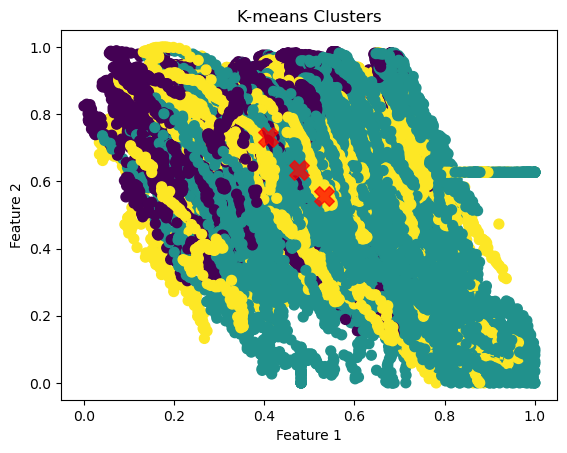

In [174]:

# Calculate the mean values for each cluster
cluster_means = scaled_df.groupby('Cluster').mean()
print(cluster_means)

# Visualize the clusters
plt.scatter(scaled_df.iloc[:, 0], scaled_df.iloc[:, 1], c=scaled_df['Cluster'], s=50, cmap='viridis')

# Also visualize the cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title('K-means Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [177]:
scaled_df

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,Month,Day,Hour,Weekday,IsWeekend,TimeOfDay_encoded,Season_encoded,Cluster
0,0.102816,0.701705,0.005130,0.000079,0.000666,0.526251,0.273821,0.552963,0.0,0.000000,0.0,1.000000,1.0,1.000000,1.0,2
1,0.098314,0.711648,0.005130,0.000111,0.000456,0.415545,0.391261,0.548716,0.0,0.000000,0.0,1.000000,1.0,1.000000,1.0,2
2,0.095179,0.711648,0.004663,0.000098,0.000549,0.397623,0.377933,0.530833,0.0,0.000000,0.0,1.000000,1.0,1.000000,1.0,2
3,0.089219,0.718750,0.005130,0.000147,0.000524,0.374149,0.354577,0.501103,0.0,0.000000,0.0,1.000000,1.0,1.000000,1.0,2
4,0.083010,0.728693,0.004819,0.000074,0.000456,0.350834,0.336895,0.483443,0.0,0.000000,0.0,1.000000,1.0,1.000000,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52411,0.116816,0.681818,0.004663,0.000061,0.000524,0.450675,0.661951,0.341892,1.0,0.966667,1.0,0.833333,1.0,0.333333,1.0,2
52412,0.114860,0.684659,0.004974,0.000079,0.000505,0.431618,0.635442,0.328305,1.0,0.966667,1.0,0.833333,1.0,0.333333,1.0,2
52413,0.113401,0.687500,0.005596,0.000135,0.000388,0.409703,0.604803,0.304251,1.0,0.966667,1.0,0.833333,1.0,0.333333,1.0,2
52414,0.108993,0.690341,0.004663,0.000104,0.000481,0.393187,0.583623,0.292891,1.0,0.966667,1.0,0.833333,1.0,0.333333,1.0,2


In [186]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor

In [187]:
# Independent variables
X = scaled_df.drop(['PowerConsumption_Zone3'], axis=1)

# Target variables
y1 = scaled_df['PowerConsumption_Zone3']

# Split data into training and test sets
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2, random_state=0)

In [188]:
model_rf1 = RandomForestRegressor(random_state=42)
model_rf1.fit(X_train, y1_train)
y1_pred = model_rf1.predict(X_test)


In [189]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mse = mean_squared_error(y1_test, y1_pred)
mae = mean_absolute_error(y1_test, y1_pred)
r2 = r2_score(y1_test, y1_pred)

print(f'Mean Absolute Error (MAE): {mae:.3f}')
print(f'Mean Squared Error: (MSE) {mse:.3f}')
print(f'R-squared (R²) score: {r2:.3f}')

Mean Absolute Error (MAE): 0.013
Mean Squared Error: (MSE) 0.001
R-squared (R²) score: 0.986


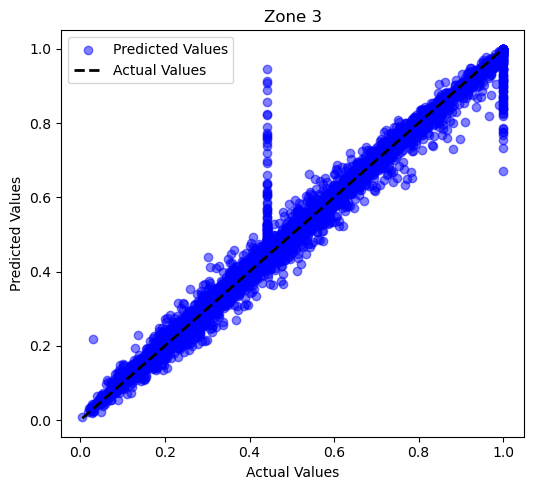

In [190]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

# Zone 1
plt.subplot(1, 3, 1)
plt.scatter(y1_test, y1_pred, alpha=0.5, label='Predicted Values', color='blue')
plt.plot([y1_test.min(), y1_test.max()], [y1_test.min(), y1_test.max()], 'k--', lw=2, label='Actual Values')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Zone 3")
plt.legend()


plt.tight_layout()
plt.show()

In [191]:
import xgboost as xgb

In [ ]:
# Independent variables
X = scaled_df.drop(['PowerConsumption_Zone3'], axis=1)

y1 = scaled_df['PowerConsumption_Zone3']

# Split data into training and test sets
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2, random_state=42)

In [192]:
import xgboost as xgb
model_XGB1 = xgb.XGBRegressor(random_state=42)
model_XGB1.fit(X_train, y1_train)
y1_pred = model_XGB1.predict(X_test)


In [193]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mse = mean_squared_error(y1_test, y1_pred)
mae = mean_absolute_error(y1_test, y1_pred)
r2 = r2_score(y1_test, y1_pred)

print(f'Mean Absolute Error (MAE): {mae:.3f}')
print(f'Mean Squared Error: (MSE) {mse:.3f}')
print(f'R-squared (R²) score: {r2:.3f}')

Mean Absolute Error (MAE): 0.019
Mean Squared Error: (MSE) 0.001
R-squared (R²) score: 0.979


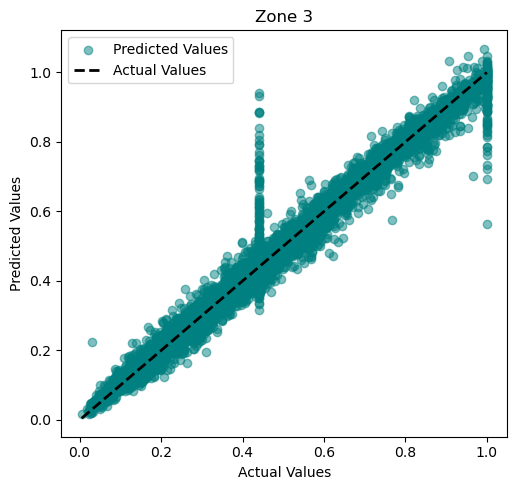

In [194]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))


# Zone 3
plt.subplot(1, 3, 3)
plt.scatter(y1_test, y1_pred, alpha=0.5, label='Predicted Values', color='teal')
plt.plot([y1_test.min(), y1_test.max()], [y1_test.min(), y1_test.max()], 'k--', lw=2, label='Actual Values')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Zone 3")
plt.legend()

plt.tight_layout()
plt.show()

In [198]:
from sklearn.tree import DecisionTreeRegressor

In [199]:
# Independent variables
X = scaled_df.drop(['PowerConsumption_Zone3'], axis=1)

y1 = scaled_df['PowerConsumption_Zone3']

# Split data into training and test sets
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2, random_state=42)

In [200]:
DecisionTreeRegressor
model_dt1 = DecisionTreeRegressor(random_state=42)
model_dt1.fit(X_train, y1_train)
y1_pred = model_dt1.predict(X_test)

In [201]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mse = mean_squared_error(y1_test, y1_pred)
mae = mean_absolute_error(y1_test, y1_pred)
r2 = r2_score(y1_test, y1_pred)

print(f'Mean Absolute Error (MAE): {mae:.3f}')
print(f'Mean Squared Error: (MSE) {mse:.3f}')
print(f'R-squared (R²) score: {r2:.3f}')

Mean Absolute Error (MAE): 0.016
Mean Squared Error: (MSE) 0.002
R-squared (R²) score: 0.968


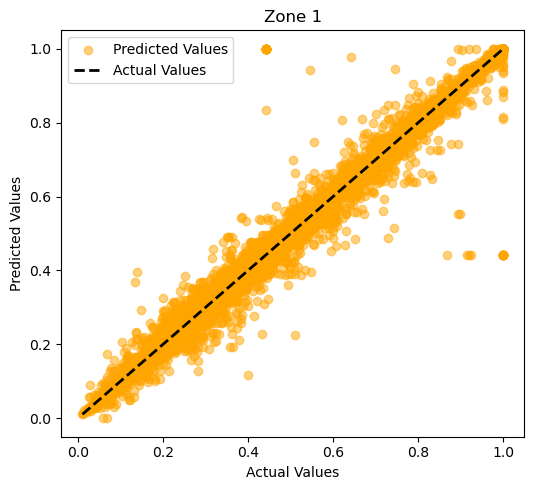

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

# Zone 3
plt.subplot(1, 3, 1)
plt.scatter(y1_test, y1_pred, alpha=0.5, label='Predicted Values', color='orange')
plt.plot([y1_test.min(), y1_test.max()], [y1_test.min(), y1_test.max()], 'k--', lw=2, label='Actual Values')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Zone 3")
plt.legend()

plt.tight_layout()
plt.show()

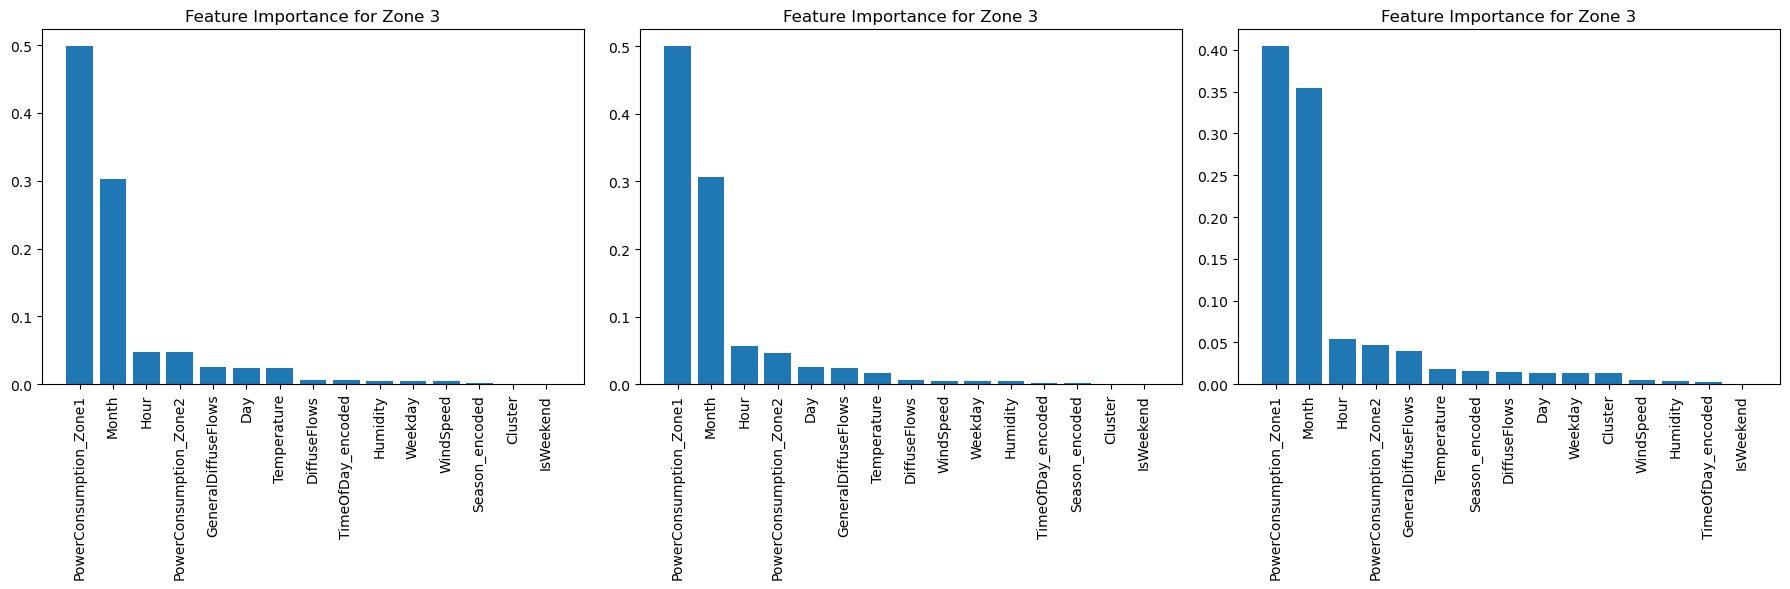

In [204]:
import matplotlib.pyplot as plt

# Model 1 feature importance
importances1 = model_rf1.feature_importances_
indices1 = np.argsort(importances1)[::-1]

# Model 2 feature importance
importances2 = model_dt1.feature_importances_
indices2 = np.argsort(importances2)[::-1]

# Model 3 feature importance
importances3 = model_XGB1.feature_importances_
indices3 = np.argsort(importances3)[::-1]

# Feature 
feature_names = X.columns

# Feature importance değerlerini görselleştirme
plt.figure(figsize=(18, 6))

# Zone 1 
plt.subplot(1, 3, 1)
plt.title("Feature Importance for Zone 3")
plt.bar(range(X.shape[1]), importances1[indices1], align='center')
plt.xticks(range(X.shape[1]), feature_names[indices1], rotation=90)
plt.tight_layout()

# Zone 2 
plt.subplot(1, 3, 2)
plt.title("Feature Importance for Zone 3")
plt.bar(range(X.shape[1]), importances2[indices2], align='center')
plt.xticks(range(X.shape[1]), feature_names[indices2], rotation=90)
plt.tight_layout()

# Zone 3 
plt.subplot(1, 3, 3)
plt.title("Feature Importance for Zone 3")
plt.bar(range(X.shape[1]), importances3[indices3], align='center')
plt.xticks(range(X.shape[1]), feature_names[indices3], rotation=90)
plt.tight_layout()

plt.show()

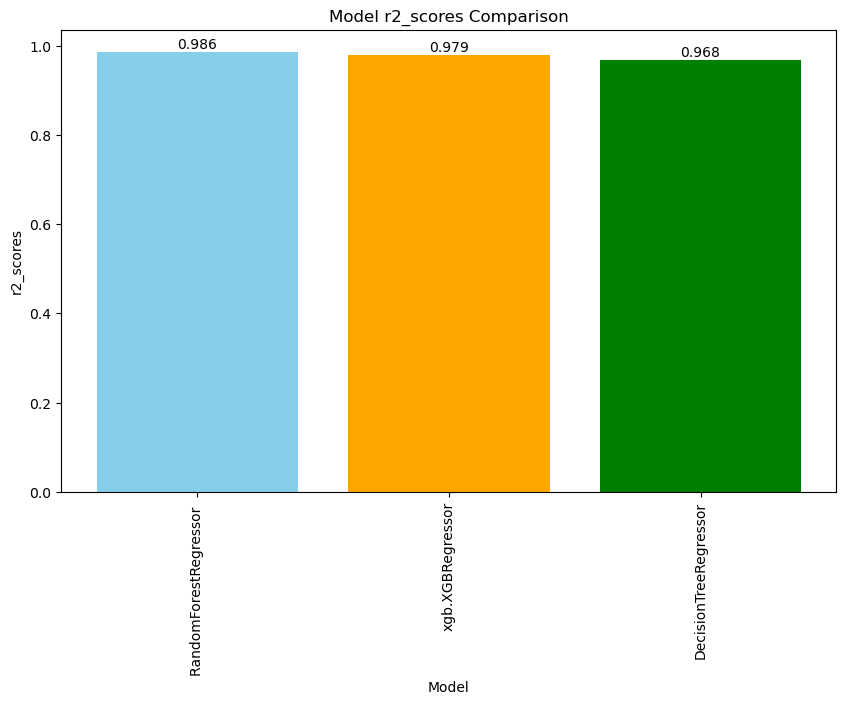

In [1]:
import matplotlib.pyplot as plt

# Model names and their corresponding accuracy scores
models = ['RandomForestRegressor ', 'xgb.XGBRegressor', 'DecisionTreeRegressor' ]
r2_scores = [0.986, 0.979, 0.968]

colors = ['skyblue', 'orange', 'green']

plt.figure(figsize=(10, 6))
bars = plt.bar(models, r2_scores, color= colors)

# Annotate the accuracy values above each bar
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.3f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                ha='center', va='bottom')

plt.xlabel('Model')
plt.ylabel('r2_scores')
plt.title('Model r2_scores Comparison')
plt.xticks(rotation= 90)
plt.show()